In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Carregando os Dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados = pd.read_json(url)
df = pd.DataFrame(dados)
df.head()

In [ ]:
# 2. Normalizando o Dataframe
df_normalized = pd.json_normalize(df.to_dict(orient='records'))
print(df_normalized.head())
df = df_normalized
df.info()

In [ ]:
# 3. Valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print("\n")

In [ ]:
# 4. Linhas duplicadas
print(" Total de linhas duplicadas:")
print(df.duplicated().sum())
print("\n")

In [ ]:
# 5. Estatísticas descritivas (para encontrar valores extremos ou inconsistentes)
print(" Estatísticas descritivas:")
print(df.describe(include='all'))
print("\n")

In [ ]:
# 6. Valores únicos por coluna (para ver categorias e detectar inconsistências)
print("Valores únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    if df[col].dtype == 'object':
        print(df[col].unique())
    print("\n")

In [78]:
# Convertendo Valores

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [79]:
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({0: "No", 1: "Yes"})

In [ ]:
yes_no_cols = [col for col in df.columns if df[col].isin(["Yes", "No"]).all()]
df[yes_no_cols] = df[yes_no_cols].replace({"Yes": True, "No": False})

In [81]:
# Selecionar variáveis numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Estatísticas descritivas
desc_stats = numericas.describe().T
desc_stats['mediana'] = numericas.median()
desc_stats = desc_stats[['count', 'mean', 'std', 'min', 'mediana', '25%', '50%', '75%', 'max']]

print("Estatísticas descritivas:")
print(desc_stats)


Estatísticas descritivas:
                          count         mean          std    min  mediana  \
customer.tenure          7267.0    32.346498    24.571773   0.00     29.0   
account.Charges.Monthly  7267.0    64.720098    30.129572  18.25     70.3   
account.Charges.Total    7256.0  2280.634213  2268.632997  18.80   1391.0   

                             25%     50%       75%      max  
customer.tenure            9.000    29.0    55.000    72.00  
account.Charges.Monthly   35.425    70.3    89.875   118.75  
account.Charges.Total    400.225  1391.0  3785.300  8684.80  


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n Distribuição de '{col}':")
    print(df[col].value_counts())
    print("------")


C:\Users\dioge\AppData\Local\Temp\ipykernel_7984\3155830272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


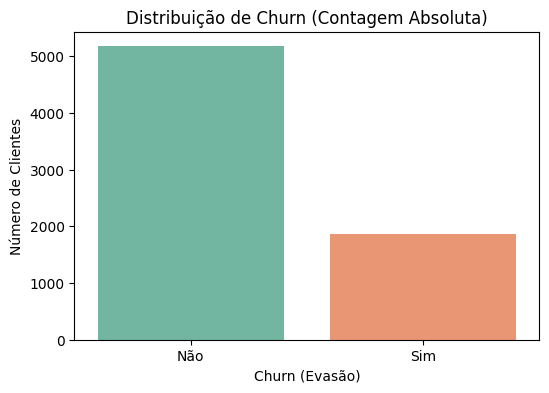

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribuição de Churn (Contagem Absoluta)')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])  # 0 = No, 1 = Yes
plt.show()

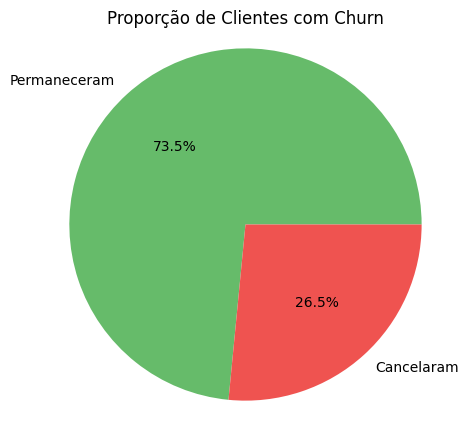

In [83]:
# Contagem de churn
churn_counts = df['Churn'].value_counts()

# Rótulos
labels = ['Permaneceram', 'Cancelaram']

# Gráfico
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['#66bb6a','#ef5350'])
plt.title('Proporção de Clientes com Churn')
plt.axis('equal')
plt.show()

In [84]:
# Padronizar a coluna Churn
df['Churn'] = df['Churn'].str.strip().str.lower().map({'yes': 'Yes', 'no': 'No'})

C:\Users\dioge\AppData\Local\Temp\ipykernel_7984\3082755905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='Set2')


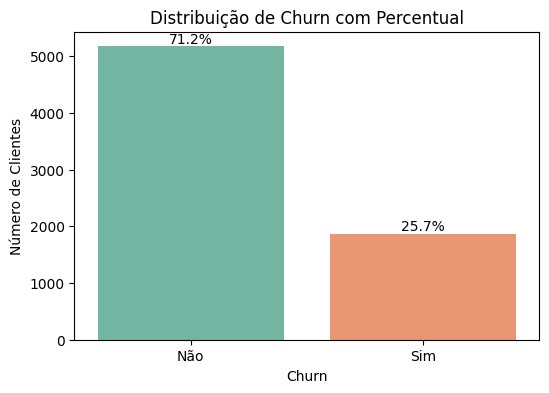

In [85]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribuição de Churn com Percentual')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])

# Adicionar porcentagem acima das barras
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()


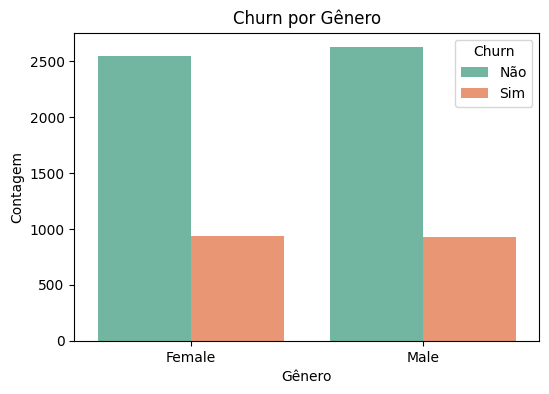

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='customer.gender', hue='Churn', palette='Set2')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.xticks(rotation=15)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn', palette='Set2')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='account.PaperlessBilling', hue='Churn', palette='Set2')
plt.title('Churn por Fatura Digital')
plt.xlabel('Fatura Digital (PaperlessBilling)')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='internet.InternetService', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Serviço de Internet')
plt.xlabel('Internet Service')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette='Set2')
plt.title('Distribuição de Total Gasto por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto (R$)')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df, palette='Set2')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tenure (meses)')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='account.Charges.Monthly', hue='Churn', fill=True, palette='Set2')
plt.title('Distribuição da Cobrança Mensal por Churn')
plt.xlabel('Cobrança Mensal (R$)')
plt.ylabel('Densidade')
plt.show()

In [ ]:
# Calcular matriz de correlação
correlacoes = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🔗 Matriz de Correlação entre Variáveis Numéricas')
plt.show()